<a href="https://colab.research.google.com/github/pvrraju/assignments/blob/main/Bonus_homework(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:


# Load datasets
heart_train_df = pd.read_csv("heart_disease_train.csv")
heart_test_df = pd.read_csv("heart_disease_test.csv")

heart_train_df

heart_test_df


,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,0,61,1.0,0,0.0,1.0,0,1,1,265.0,200.0,125.0,29.50,68.0,256.0,1
844,0,54,2.0,0,0.0,0.0,1,0,0,321.0,150.0,93.0,22.50,75.0,131.0,0
845,1,39,1.0,1,30.0,0.0,0,0,0,292.0,120.0,85.0,31.09,85.0,NaN,0
846,1,68,1.0,0,0.0,0.0,0,1,1,184.0,157.0,97.0,33.16,110.0,148.0,1


In [ ]:

# Checking for missing data

test_null_counts = heart_test_df.isnull().sum()
train_null_counts = heart_train_df.isnull().sum()

test_missing_columns = test_null_counts[test_null_counts > 0]
train_missing_columns = train_null_counts[train_null_counts > 0]

test_missing_columns, train_missing_columns


(education     21
 cigsPerDay     4
 BPMeds        11
 totChol        6
 BMI            3
 glucose       73
 dtype: int64,
 education      84
 cigsPerDay     25
 BPMeds         42
 totChol        44
 BMI            16
 heartRate       1
 glucose       315
 dtype: int64)

In [ ]:

# Identifying data types of columns with missing values
def get_column_data_types(dataset, missing_cols):
    data_types = {}
    for column in missing_cols.index:
        unique_vals = dataset[column].dropna().unique()
        if len(unique_vals) <= 10 or dataset[column].dtype == 'object':
            data_types[column] = 'Categorical'
        else:
            data_types[column] = 'Numerical'
    return data_types

test_col_types = get_column_data_types(heart_test_df, test_missing_columns)
train_col_types = get_column_data_types(heart_train_df, train_missing_columns)

test_col_types, train_col_types


({'education': 'Categorical',
  'cigsPerDay': 'Numerical',
  'BPMeds': 'Categorical',
  'totChol': 'Numerical',
  'BMI': 'Numerical',
  'glucose': 'Numerical'},
 {'education': 'Categorical',
  'cigsPerDay': 'Numerical',
  'BPMeds': 'Categorical',
  'totChol': 'Numerical',
  'BMI': 'Numerical',
  'heartRate': 'Numerical',
  'glucose': 'Numerical'})

In [ ]:

def impute_missing_values(df, group_cols, target_col, strategy='mode'):
    if strategy == 'mode':
        group_vals = df.groupby(group_cols)[target_col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    elif strategy == 'median':
        group_vals = df.groupby(group_cols)[target_col].transform('median')
    else:
        group_vals = df.groupby(group_cols)[target_col].transform('mean')
    df[target_col] = df[target_col].fillna(group_vals)
    return df

categorical_features_na = ['education', 'BPMeds']  # Categorical columns with missing values
numerical_features_na = ['cigsPerDay', 'totChol', 'BMI', 'glucose', 'heartRate']  # Numerical columns with missing values


In [ ]:



feature = 'education'
mode_age_map = heart_train_df.groupby('age')[feature].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
heart_train_df = impute_missing_values(heart_train_df, ['age'], feature, strategy='mode')
heart_test_df[feature] = heart_test_df['age'].map(mode_age_map).combine_first(heart_test_df[feature])

feature = 'BPMeds'
mode_stroke_map = heart_train_df.groupby('prevalentStroke')[feature].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
heart_train_df = impute_missing_values(heart_train_df, ['prevalentStroke'], feature, strategy='mode')
heart_test_df[feature] = heart_test_df['prevalentStroke'].map(mode_stroke_map).combine_first(heart_test_df[feature])



feature = "glucose"
median_sysBP_map = heart_train_df.groupby('sysBP')[feature].median().to_dict()
heart_train_df = impute_missing_values(heart_train_df, ['sysBP'], feature, strategy='median')
heart_test_df[feature] = heart_test_df['sysBP'].map(median_sysBP_map).combine_first(heart_test_df[feature])


feature = "BMI"
median_age_map = heart_train_df.groupby('age')[feature].median().to_dict()
heart_train_df = impute_missing_values(heart_train_df, ['age'], feature, strategy='median')
heart_test_df[feature] = heart_test_df['age'].map(median_age_map).combine_first(heart_test_df[feature])


feature = "heartRate"
median_age_hr_map = heart_train_df.groupby('age')[feature].median().to_dict()
heart_train_df = impute_missing_values(heart_train_df, ['age'], feature, strategy='median')
heart_test_df[feature] = heart_test_df['age'].map(median_age_hr_map).combine_first(heart_test_df[feature])


feature = "totChol"
median_age_chol_map = heart_train_df.groupby('age')[feature].median().to_dict()
heart_train_df = impute_missing_values(heart_train_df, ['age'], feature, strategy='median')
heart_test_df[feature] = heart_test_df['age'].map(median_age_chol_map).combine_first(heart_test_df[feature])


feature = "cigsPerDay"
median_smoker_map = heart_train_df.groupby('currentSmoker')[feature].median().to_dict()
heart_train_df = impute_missing_values(heart_train_df, ['currentSmoker'], feature, strategy='median')
heart_test_df[feature] = heart_test_df['currentSmoker'].map(median_smoker_map).combine_first(heart_test_df[feature])


In [ ]:

heart_train_df.fillna(heart_train_df.median(), inplace=True)
heart_test_df.fillna(heart_test_df.median(), inplace=True)

X_train_set = heart_train_df.drop(columns=['TenYearCHD']).values
y_train_set = heart_train_df['TenYearCHD'].values
X_test_set = heart_test_df.drop(columns=['TenYearCHD']).values
y_test_set = heart_test_df['TenYearCHD'].values


In [ ]:

# Normalize features using Z-score normalization
train_means = np.mean(X_train_set, axis=0)
train_stds = np.std(X_train_set, axis=0)

train_stds[train_stds == 0] = 1  # Prevent division by zero
X_train_normalized = (X_train_set - train_means) / train_stds
X_test_normalized = (X_test_set - train_means) / train_stds  # Use training stats for test set

# Add bias term to features
X_train_bias = np.c_[np.ones(X_train_normalized.shape[0]), X_train_normalized]
X_test_bias = np.c_[np.ones(X_test_normalized.shape[0]), X_test_normalized]

# Initialize weights
weights_vector = np.zeros(X_train_bias.shape[1])


In [ ]:

# Hyperparameters
learning_rate_val = 0.01  # Learning rate
num_epochs_val = 10  # Number of epochs
num_samples_train = len(y_train_set)  # Number of training samples


In [ ]:

def sigmoid_activation(z_input):
    return 1 / (1 + np.exp(-z_input))


In [ ]:

for epoch_num in range(num_epochs_val):

    linear_comb = X_train_bias @ weights_vector
    predictions = sigmoid_activation(linear_comb)

    # Clip predictions for numerical stability
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)

    loss_value = -(1/num_samples_train) * np.sum(y_train_set * np.log(predictions) + (1 - y_train_set) * np.log(1 - predictions))

    print(f'Epoch {epoch_num+1}/{num_epochs_val}, Loss: {loss_value:.4f}')

    gradients = (1/num_samples_train) * (X_train_bias.T @ (predictions - y_train_set))

    weights_vector -= learning_rate_val * gradients


Epoch 1/10, Loss: 0.6931
Epoch 2/10, Loss: 0.6917
Epoch 3/10, Loss: 0.6902
Epoch 4/10, Loss: 0.6888
Epoch 5/10, Loss: 0.6874
Epoch 6/10, Loss: 0.6859
Epoch 7/10, Loss: 0.6845
Epoch 8/10, Loss: 0.6831
Epoch 9/10, Loss: 0.6817
Epoch 10/10, Loss: 0.6803


In [ ]:

print("Optimized Weights after 10 epochs :", weights_vector)


Optimized Weights after 10 epochs : [-0.03439014  0.0033074   0.00758236 -0.00138371  0.00083774  0.00190414
  0.00356298  0.00277183  0.00583247  0.00298684  0.00297132  0.00718568
  0.00477242  0.00205271  0.00096724  0.00343725]


In [ ]:

# Make predictions
y_train_pred = sigmoid_activation(X_train_bias @ weights_vector) >= 0.5
y_test_pred = sigmoid_activation(X_test_bias @ weights_vector) >= 0.5

# Custom Confusion Matrix
def custom_confusion_matrix_func(actual, predicted):
    TP = np.sum((actual == 1) & (predicted == 1))
    TN = np.sum((actual == 0) & (predicted == 0))
    FP = np.sum((actual == 0) & (predicted == 1))
    FN = np.sum((actual == 1) & (predicted == 0))
    return np.array([[TP, FN], [FP, TN]])

# Custom Accuracy
def compute_accuracy_func(actual, predicted):
    return np.mean(actual == predicted)

# Custom Precision
def compute_precision_func(actual, predicted):
    TP = np.sum((actual == 1) & (predicted == 1))
    FP = np.sum((actual == 0) & (predicted == 1))
    return TP / (TP + FP) if (TP + FP) > 0 else 0

# Custom Recall
def compute_recall_func(actual, predicted):
    TP = np.sum((actual == 1) & (predicted == 1))
    FN = np.sum((actual == 1) & (predicted == 0))
    return TP / (TP + FN) if (TP + FN) > 0 else 0

# f1 score calculating
def compute_f1_score_func(actual, predicted):
    precision = compute_precision_func(actual, predicted)
    recall = compute_recall_func(actual, predicted)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Compute metrics for training set
train_conf_matrix = custom_confusion_matrix_func(y_train_set, y_train_pred)
train_accuracy = compute_accuracy_func(y_train_set, y_train_pred)
train_precision = compute_precision_func(y_train_set, y_train_pred)
train_recall = compute_recall_func(y_train_set, y_train_pred)
train_f1_score = compute_f1_score_func(y_train_set, y_train_pred)


In [ ]:

print("\nTraining Metrics:")
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1_score:.4f}")

# Compute metrics for test set
test_conf_matrix = custom_confusion_matrix_func(y_test_set, y_test_pred)
test_accuracy = compute_accuracy_func(y_test_set, y_test_pred)
test_precision = compute_precision_func(y_test_set, y_test_pred)
test_recall = compute_recall_func(y_test_set, y_test_pred)
test_f1_score = compute_f1_score_func(y_test_set, y_test_pred)

print("\nTest Metrics:")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1_score:.4f}")



Training Metrics:
Confusion Matrix:
[[ 121  395]
 [ 199 2675]]
Accuracy: 0.8248
Precision: 0.3781
Recall: 0.2345
F1 Score: 0.2895

Test Metrics:
Confusion Matrix:
[[ 28 100]
 [ 41 679]]
Accuracy: 0.8337
Precision: 0.4058
Recall: 0.2188
F1 Score: 0.2843


Hyperparameter Tuning Results:
    learning_rate  epochs  batch_size  train_accuracy  test_accuracy  \
0           0.001      10          16        0.843068       0.853774   
1           0.001      10          32        0.841298       0.841981   
2           0.001      10          64        0.836283       0.839623   
3           0.001      50          16        0.852802       0.850236   
4           0.001      50          32        0.850442       0.850236   
5           0.001      50          64        0.845723       0.854953   
6           0.001     100          16        0.853097       0.850236   
7           0.001     100          32        0.852802       0.851415   
8           0.001     100          64        0.850442       0.850236   
9           0.010      10          16        0.853097       0.850236   
10          0.010      10          32        0.852507       0.849057   
11          0.010      10          64        0.850442       0.850236   
12          0.010      50        

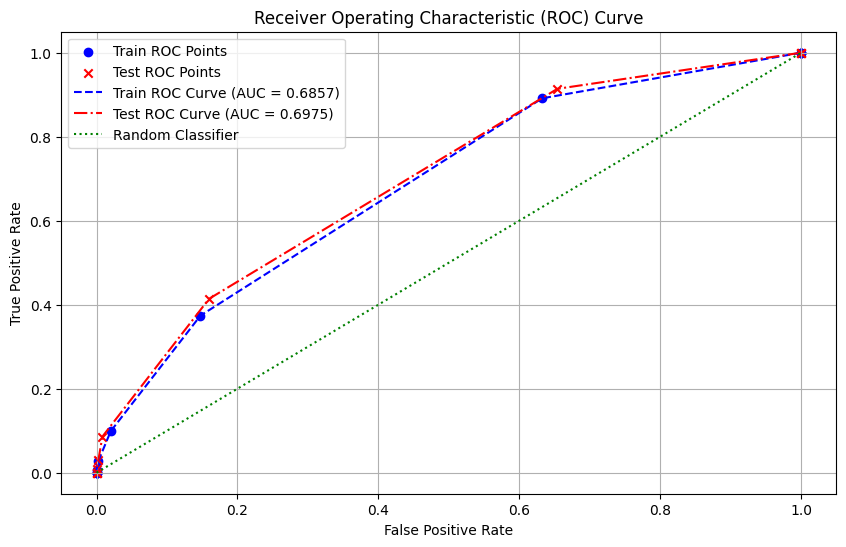

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# (Previous data preprocessing code remains the same)

# def sigmoid_activation(z_input):
#     return 1 / (1 + np.exp(-z_input))

def compute_metrics(actual, predicted):
    TP = np.sum((actual == 1) & (predicted == 1))
    TN = np.sum((actual == 0) & (predicted == 0))
    FP = np.sum((actual == 0) & (predicted == 1))
    FN = np.sum((actual == 1) & (predicted == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'confusion_matrix': np.array([[TP, FN], [FP, TN]])
    }

def custom_logistic_regression(X_train, y_train, X_test, y_test, learning_rate, num_epochs, batch_size):
    # Normalize features
    train_means = np.mean(X_train, axis=0)
    train_stds = np.std(X_train, axis=0)
    train_stds[train_stds == 0] = 1  # Prevent division by zero

    X_train_normalized = (X_train - train_means) / train_stds
    X_test_normalized = (X_test - train_means) / train_stds

    # Add bias term
    X_train_bias = np.c_[np.ones(X_train_normalized.shape[0]), X_train_normalized]
    X_test_bias = np.c_[np.ones(X_test_normalized.shape[0]), X_test_normalized]

    # Initialize weights
    weights_vector = np.zeros(X_train_bias.shape[1])

    # Training loop with mini-batch gradient descent
    num_samples = len(y_train)

    for epoch in range(int(num_epochs)):  # Convert to integer
        # Shuffle the training data
        shuffled_indices = np.random.permutation(num_samples)
        X_train_shuffled = X_train_bias[shuffled_indices]
        y_train_shuffled = y_train[shuffled_indices]

        # Mini-batch gradient descent
        for start in range(0, num_samples, int(batch_size)):  # Convert to integer
            end = start + int(batch_size)
            X_batch = X_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]

            # Compute predictions
            linear_comb = X_batch @ weights_vector
            predictions = sigmoid_activation(linear_comb)

            # Clip predictions for numerical stability
            predictions = np.clip(predictions, 1e-15, 1 - 1e-15)

            # Compute gradients
            gradients = (1/len(y_batch)) * (X_batch.T @ (predictions - y_batch))

            # Update weights
            weights_vector -= learning_rate * gradients

    # Make predictions
    y_train_pred_proba = sigmoid_activation(X_train_bias @ weights_vector)
    y_test_pred_proba = sigmoid_activation(X_test_bias @ weights_vector)

    y_train_pred = y_train_pred_proba >= 0.5
    y_test_pred = y_test_pred_proba >= 0.5

    # Compute metrics
    train_metrics = compute_metrics(y_train, y_train_pred)
    test_metrics = compute_metrics(y_test, y_test_pred)

    return {
        'weights': weights_vector,
        'train_metrics': train_metrics,
        'test_metrics': test_metrics,
        'train_pred_proba': y_train_pred_proba,
        'test_pred_proba': y_test_pred_proba
    }

# Hyperparameter tuning continues as before...

# Hyperparameter tuning
learning_rates = [0.001, 0.01, 0.1]
num_epochs_list = [10, 50, 100]
batch_sizes = [16, 32, 64]

# Store results
results = []

# Grid search
for lr, epochs, batch_size in product(learning_rates, num_epochs_list, batch_sizes):
    result = custom_logistic_regression(
        X_train_set, y_train_set,
        X_test_set, y_test_set,
        learning_rate=lr,
        num_epochs=epochs,
        batch_size=batch_size
    )

    results.append({
        'learning_rate': lr,
        'epochs': epochs,
        'batch_size': batch_size,
        'train_accuracy': result['train_metrics']['accuracy'],
        'test_accuracy': result['test_metrics']['accuracy'],
        'train_precision': result['train_metrics']['precision'],
        'test_precision': result['test_metrics']['precision'],
        'train_recall': result['train_metrics']['recall'],
        'test_recall': result['test_metrics']['recall'],
        'train_f1': result['train_metrics']['f1_score'],
        'test_f1': result['test_metrics']['f1_score']
    })

# After printing results, find the best configuration
results_df = pd.DataFrame(results)
best_row = results_df.loc[results_df['test_accuracy'].idxmax()]

print("Hyperparameter Tuning Results:")
print(results_df)

print(best_row)

# Explicitly convert to appropriate types
best_result = custom_logistic_regression(
    X_train_set, y_train_set,
    X_test_set, y_test_set,
    learning_rate=best_row['learning_rate'],
    num_epochs=int(best_row['epochs']),
    batch_size=int(best_row['batch_size'])
)


# Custom ROC Curve Calculation
def compute_roc_points(y_true, y_pred_proba, num_thresholds=11):
    thresholds = np.linspace(0, 1, num_thresholds)
    roc_points = []

    for threshold in thresholds:
        # Predictions based on current threshold
        predictions = (y_pred_proba >= threshold).astype(int)

        # Compute confusion matrix components
        TP = np.sum((y_true == 1) & (predictions == 1))
        TN = np.sum((y_true == 0) & (predictions == 0))
        FP = np.sum((y_true == 0) & (predictions == 1))
        FN = np.sum((y_true == 1) & (predictions == 0))

        # Compute ROC points
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate (Recall)
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate

        roc_points.append((FPR, TPR, threshold))

    return roc_points

# Compute ROC points for train and test
train_roc_points = compute_roc_points(y_train_set, best_result['train_pred_proba'])
test_roc_points = compute_roc_points(y_test_set, best_result['test_pred_proba'])

# Custom AUC Calculation (Trapezoidal Rule)
def compute_auc(roc_points):
    # Sort points by FPR
    sorted_points = sorted(roc_points, key=lambda x: x[0])

    auc = 0.0
    for i in range(1, len(sorted_points)):
        prev_fpr, prev_tpr, _ = sorted_points[i-1]
        curr_fpr, curr_tpr, _ = sorted_points[i]

        # Trapezoidal rule for area calculation
        auc += 0.5 * (curr_fpr - prev_fpr) * (prev_tpr + curr_tpr)

    return auc

# Compute AUC
train_auc = compute_auc(train_roc_points)
test_auc = compute_auc(test_roc_points)

print(f"\nTrain AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Plotting ROC Curves
plt.figure(figsize=(10, 6))

# Plot individual threshold points
plt.scatter([p[0] for p in train_roc_points], [p[1] for p in train_roc_points],
            label='Train ROC Points', color='blue', marker='o')
plt.scatter([p[0] for p in test_roc_points], [p[1] for p in test_roc_points],
            label='Test ROC Points', color='red', marker='x')

# Plot ROC curves
plt.plot([p[0] for p in train_roc_points], [p[1] for p in train_roc_points],
         color='blue', linestyle='--', label=f'Train ROC Curve (AUC = {train_auc:.4f})')
plt.plot([p[0] for p in test_roc_points], [p[1] for p in test_roc_points],
         color='red', linestyle='-.', label=f'Test ROC Curve (AUC = {test_auc:.4f})')

# Diagonal line representing random classifier
plt.plot([0, 1], [0, 1], color='green', linestyle=':', label='Random Classifier')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# The rest of the ROC curve and AUC calculation remains the same
# (Previous ROC curve and AUC calculation code)